# Скорость
# dx трапеция

In [76]:
import math
import matplotlib.pyplot as plt
import numpy
import cv2
from IPython.display import Image
import os

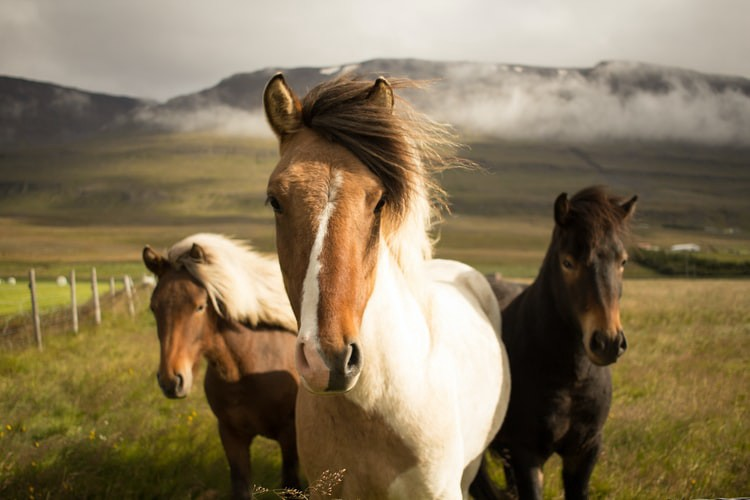

In [3]:
Image(filename='../jupyter/1.jpeg')

In [45]:
image = cv2.imread('../jupyter/Lenna.png')

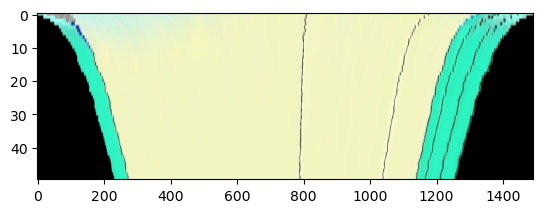

In [180]:
def velocity(angle, peaks):
    #   frames  - матрица для каждого кадра со значением цветов RGB
    #   peaks   - положения пиков интенсивности на гранях отверстий
    #   angle   - угол поворота в рад (по часовой +, против -)
    
    new_peaks = []      # повернутая система координат k - номер кадра, i - номер пика,
                        #   = координата пика
    dist = [[]]         # расстояния между пиками
    dx = 0              # сторона усеченной пирамиды
    
    for k in range(2): 
        #dist.append()
        temp = []
        for i in range(3):
            temp.append((peaks[k][i][1]+peaks[k][i][0]/math.cos(angle[k]))*(math.cos(angle)+math.sin(angle[k])*math.tan(angle[k]))**(-1))
            try:
                dist[k][i] = temp[-1] - dist[k][i]
            except:
                pass
            dist[k].append(temp[-1])
        
        new_peaks.append(temp)

    #   проверка на потерю пика у края кадра
    if dist[0][0]>dist[1][0]:
        dx = new_peaks[0][1] - new_peaks[1][1]
    else:
        dx = new_peaks[0][0] - new_peaks[0][1]
    
    return dx # Кол-во пикселей

def trapezoid(frame, angle, dx):
    #   frames  - матрица для каждого кадра со значением цветов RGB
    #   angle   - угол поворота в рад (по часовой +, против -)

    center_x = round(len(frame)/2-1)
    center_y = round(len(frame[0])/2-1)

    radius = min(center_y,center_x)
    rad_inner = radius-dx

    trap=[]
    #frame_copy = frame.copy()
    row = -1
    d_phi = 2*math.pi/abs(2*math.pi*center_y)
    
    while radius > rad_inner:
        
        trap.append([])
        row += 1
        phi = math.pi/2-angle

        prev_px = []
        while phi < 2 * math.pi + math.pi/2-angle:
            #prev_px = []
            #print(round(center_x+radius*math.cos(math.pi/2+phi)), round(center_y-radius*math.sin(math.pi/2+phi)))
            #next_px = [round(center_x+radius*math.cos(math.pi/2+phi)), round(center_y-radius*math.sin(math.pi/2+phi))]
            next_px = [round(center_x+radius*math.cos(-math.pi/2-phi)), round(center_y+radius*math.sin(-math.pi/2-phi))]
            try:
                if prev_px != next_px:
                    #print(next_px[0],next_px[1])
                    trap[row].append(list(frame[next_px[0]][next_px[1]]))
            except:
                trap[row].append(list(frame[next_px[0]][next_px[1]]))
            
            # Новый круг
            prev_px = next_px.copy()
            phi += d_phi
            
        radius -= 1
        d_phi = 2*math.pi/(len(trap[row])-2)
    
    #print(trap)
    trap = fill(trap)
    
    return trap

def fill(arr):

    #del arr[0][0]
    max_len = len(arr[0])
    for row in range(1, len(arr)):
        #for col in range(len(arr[row], len(arr[0]))):
        #    arr[row].app
        arr[row] = [[0,0,0]] * int((max_len - len(arr[row]))/2) + arr[row] + [[0,0,0]] * int((max_len - len(arr[row])) / 2)
        if len(arr[row])!=max_len:
            arr[row].append([0,0,0]*(max_len - len(arr[row])))
    
    return arr

image = cv2.imread('../jupyter/5.png')
image2 = trapezoid(image, math.pi/12, 50)
plt.imshow(image2, aspect=10)

In [52]:
#print(image2[0])

In [59]:
#image2 = (trapezoid(image, math.pi/6, 15))

KeyboardInterrupt: 

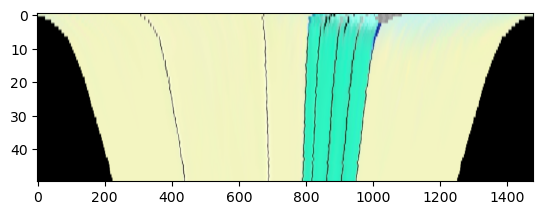

In [175]:
#for i in range(len(image2)):
#    for k in range(len(image2[i])):
#        if len(image2[i][k])!=3:
#            print(image2[i][k])
#            print(i, k)

#image2 = image2[...,::-1]
plt.imshow(image2, aspect=10)

In [190]:
#print(image2[0])

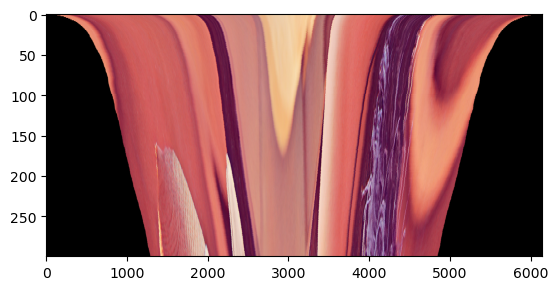

In [56]:
#image3=numpy.array([numpy.array(xi) for xi in image2])

def bgr_to_rgb(pixel):
    temp = [pixel[2],pixel[1],pixel[0]]
    return temp

for row in range(len(image2)):
    image2[row] = list(map(bgr_to_rgb, image2[row]))

def kostyl(arr):
    for row in range(len(arr)):
        arr[row] = list(map(bgr_to_rgb, arr[row]))

#print(image2[0])
#image3g = image3[...,::-1]
plt.imshow(image2, aspect=10)

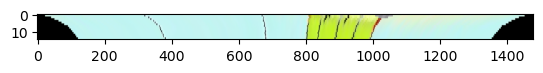

In [152]:
im_earth = cv2.imread('../jupyter/5.png')
im_earth_edit = trapezoid(im_earth, math.pi/12, 15)
kostyl(im_earth_edit)
plt.imshow(im_earth_edit, aspect=5)

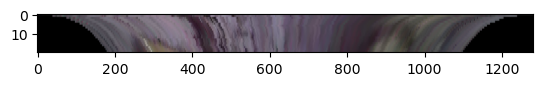

In [69]:
pic = cv2.imread(r'E:\Tokodust\data_frames\1\frame_000.png')
pic2 = trapezoid(pic, 0.009258994662123082, 20)
kostyl(pic2)
plt.imshow(pic2, aspect=5)

In [84]:
def normalnye_ugly(path):
    with open(path + "angle.txt", 'r') as file:
        f = file.read()
    arr = []
    array = f.split('.')
    a = array[0] + '.'
    b = ''
    for i in range(1, len(array)):
        if '-' in array[i]:
            b = array[i][-2] + '.'
            a += array[i][:-2]
        else:
            b = array[i][-1] + '.'
            a += array[i][:-1]
        arr.append(float(a))
        a = b

    return arr

In [96]:
if not os.path.exists(r'E:\Tokodust\data_frames\8.1'):
    os.mkdir(r'E:\Tokodust\data_frames\8.1')

def get_peaks(path):
    with open(path + "picks.txt", 'r') as file:
        f = file.readlines()
    arr = []
    for i in f:
        a = i.split()
        arrr = []
        for j in range(0, len(a), 2):
            arrr.append([int(a[j]), int(a[j+1])])
        arr.append(arrr)
    return arr

In [185]:
file_count = sum(len(files) for _, _, files in os.walk('E:/Tokodust/data_frames/8'))-2

angles = normalnye_ugly('E:/Tokodust/data_frames/8/')

peaks = get_peaks('E:/Tokodust/data_frames/8/')

all_pics = []
for i in range(file_count):
    try:
        pic = cv2.imread(r'E:\Tokodust\data_frames\8\frame_{:03d}.png'.format(i))
        #dx = velocity(angles, peaks[i:])
        pic2 = trapezoid(pic, angles[i], 5)
        kostyl(pic2)
        
        #plt.imshow(pic2, aspect=5)
        cv2.imwrite(r'E:\Tokodust\data_frames\8.1\{:03d}.png'.format(i), numpy.array(pic2))
        #all_pics.append(pic2)
        #result = Image.fromarray((visual * 255).astype(numpy.uint8))
    except:
        pass

In [184]:
print(pic2)

[[[239, 238, 241], [251, 250, 253], [250, 249, 252], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 254, 255], [249, 246, 250], [243, 240, 244], [223, 220, 224], [216, 210, 215], [193, 187, 192], [192, 186, 191], [193, 187, 192], [196, 190, 195], [199, 193, 198], [198, 192, 197], [188, 182, 187], [177, 172, 174], [175, 173, 174], [182, 176, 181], [185, 179, 184], [186, 179, 182], [189, 182, 185], [191, 184, 187], [189, 182, 185], [186, 179, 182], [179, 172, 175], [178, 168, 169], [173, 163, 164], [167, 162, 164], [160, 155, 157], [161, 154, 154], [158, 151, 154], [157, 150, 153], [153, 145, 151], [148, 140, 146], [143, 137, 142], [139, 133, 138], [142, 127, 135], [141, 126, 134], [136, 125, 132], [134, 127, 139], [138, 124, 137], [136, 122, 135], [134, 118, 131], [134, 118, 131], [128, 117, 126], [127, 116, 125], [124, 113, 122], [121, 112, 123], [119, 110, 121], [118, 111, 123], [118, 111, 123], [118, 111, 123], [118, 111, 123], [119, 110, 123], [118, 111, 125], [113, 106, 1

In [199]:
import TrapStretch

map2d=TrapStretch.stretch_sequence_of_traps()

TypeError: stretch_sequence_of_traps() missing 1 required positional argument: 'traps'

In [191]:
all_pics.shape()

AttributeError: 'list' object has no attribute 'shape'

In [195]:
all_pics[0]

[[[71, 55, 70],
  [72, 53, 71],
  [69, 50, 68],
  [66, 47, 65],
  [64, 45, 63],
  [63, 44, 58],
  [63, 44, 58],
  [62, 43, 57],
  [63, 44, 58],
  [61, 43, 54],
  [59, 41, 52],
  [59, 41, 52],
  [57, 38, 52],
  [56, 37, 51],
  [55, 36, 50],
  [55, 36, 50],
  [54, 35, 49],
  [54, 35, 49],
  [49, 33, 48],
  [50, 34, 49],
  [48, 32, 47],
  [47, 33, 48],
  [47, 33, 48],
  [48, 34, 49],
  [48, 34, 49],
  [52, 38, 53],
  [54, 45, 58],
  [57, 48, 61],
  [56, 49, 59],
  [61, 48, 67],
  [68, 56, 72],
  [73, 61, 77],
  [71, 60, 67],
  [73, 62, 69],
  [80, 68, 73],
  [75, 63, 68],
  [75, 63, 68],
  [75, 61, 66],
  [74, 60, 65],
  [76, 59, 62],
  [76, 59, 62],
  [94, 77, 80],
  [80, 57, 68],
  [90, 67, 78],
  [107, 88, 92],
  [116, 97, 101],
  [133, 117, 113],
  [157, 141, 137],
  [168, 156, 146],
  [185, 173, 163],
  [190, 178, 168],
  [191, 179, 169],
  [181, 169, 159],
  [185, 177, 166],
  [187, 179, 168],
  [186, 186, 170],
  [188, 188, 172],
  [186, 190, 173],
  [188, 192, 175],
  [188, 192, 1